<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-11-22 20:22:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  32.2MB/s    in 4.0s    

2025-11-22 20:22:29 (37.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



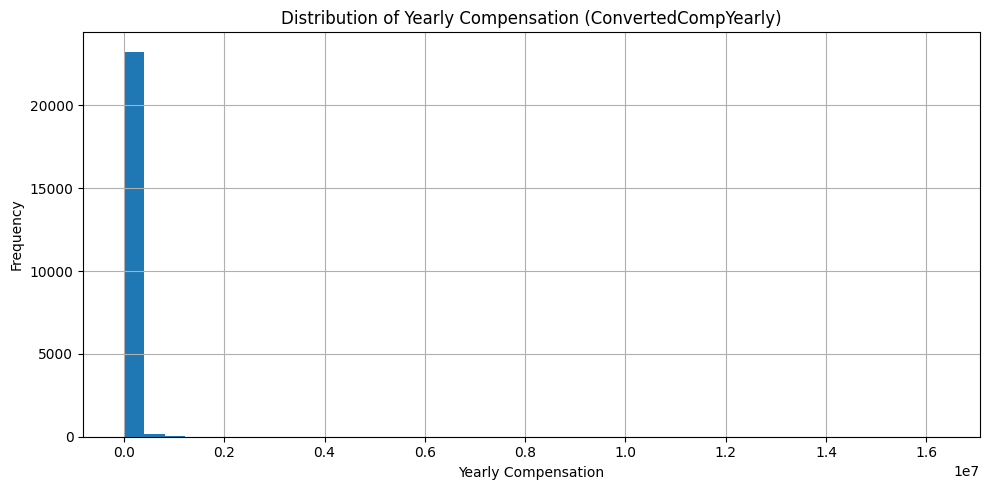

In [4]:
# Load dataset
df = pd.read_csv("survey-data.csv")

# Drop missing values in compensation
df_comp = df['ConvertedCompYearly'].dropna()

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(df_comp, bins=40)
plt.title("Distribution of Yearly Compensation (ConvertedCompYearly)")
plt.xlabel("Yearly Compensation")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



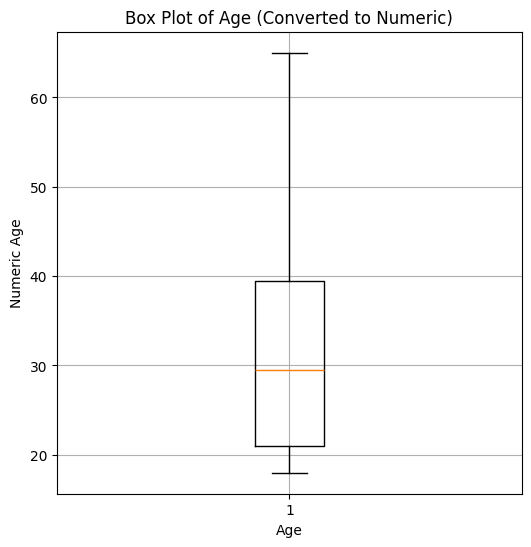

In [5]:
import re

# Function to convert age ranges to numeric midpoint
def age_to_midpoint(age_str):
    match = re.findall(r'\d+', str(age_str))
    if len(match) == 2:  # e.g. "25-34 years old"
        return (int(match[0]) + int(match[1])) / 2
    elif len(match) == 1:  # e.g. "Under 18 years old" → "18"
        return int(match[0])
    else:
        return None

# Apply conversion
df['Age_num'] = df['Age'].apply(age_to_midpoint)

# Drop invalid values
df_age_clean = df['Age_num'].dropna()

# Plot box plot
plt.figure(figsize=(6,6))
plt.boxplot(df_age_clean)
plt.title("Box Plot of Age (Converted to Numeric)")
plt.xlabel("Age")
plt.ylabel("Numeric Age")
plt.grid(True)
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



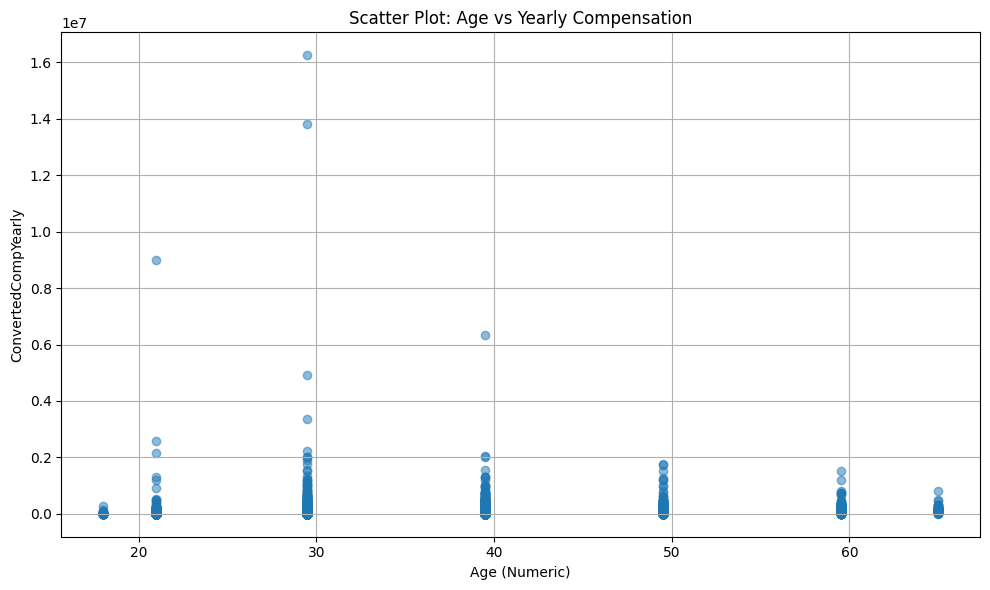

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load dataset
df = pd.read_csv("survey-data.csv")

# Function to convert age ranges to numeric midpoint
def age_to_midpoint(age_str):
    nums = re.findall(r'\d+', str(age_str))
    if len(nums) == 2:
        return (int(nums[0]) + int(nums[1])) / 2
    elif len(nums) == 1:
        return int(nums[0])   # e.g., "Under 18"
    else:
        return None

# Create numeric age column
df['Age_numeric'] = df['Age'].apply(age_to_midpoint)

# Keep relevant rows
df_scatter = df[['Age_numeric', 'ConvertedCompYearly']].dropna()

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_scatter['Age_numeric'], df_scatter['ConvertedCompYearly'], alpha=0.5)
plt.title("Scatter Plot: Age vs Yearly Compensation")
plt.xlabel("Age (Numeric)")
plt.ylabel("ConvertedCompYearly")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


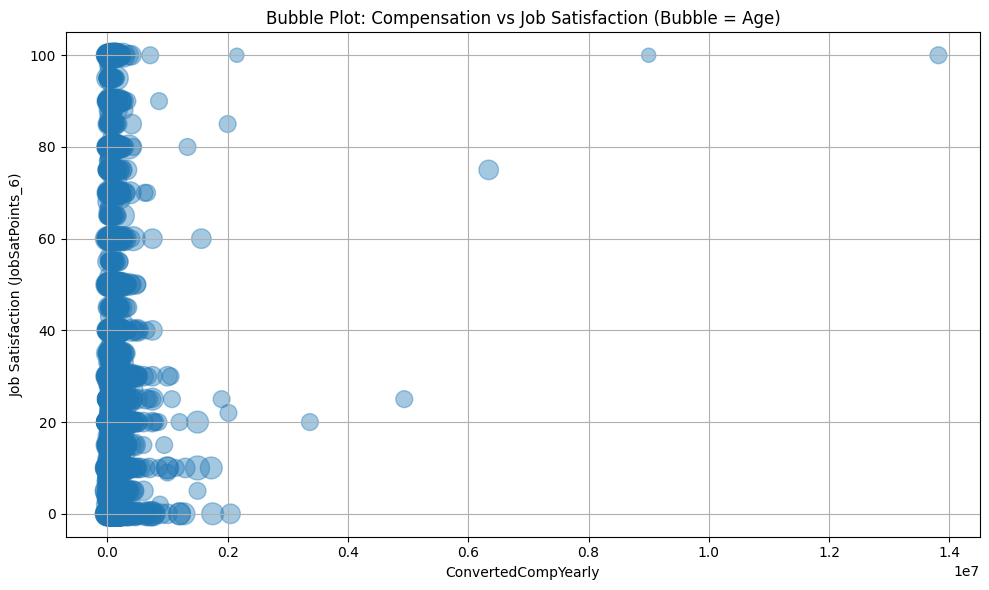

In [7]:
# Keep only required columns
df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric']].dropna()

# Scale bubble size for readability
bubble_size = df_bubble['Age_numeric'] * 5   # adjust factor if bubbles too small/large

# Bubble plot
plt.figure(figsize=(10,6))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=bubble_size,
    alpha=0.4
)

plt.title("Bubble Plot: Compensation vs Job Satisfaction (Bubble = Age)")
plt.xlabel("ConvertedCompYearly")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



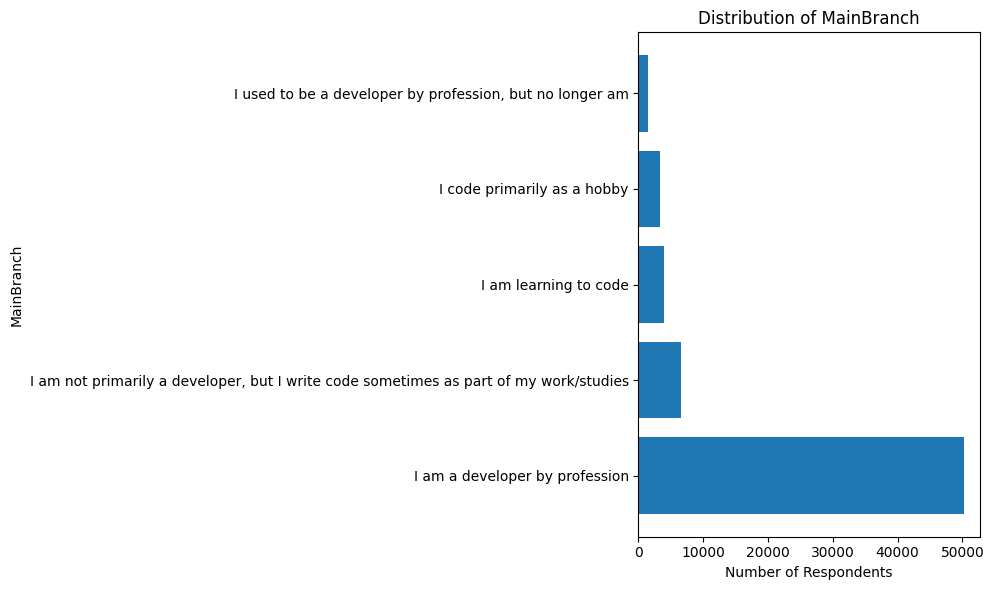

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Count values
mainbranch_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(10,6))
plt.barh(mainbranch_counts.index, mainbranch_counts.values)
plt.title("Distribution of MainBranch")
plt.xlabel("Number of Respondents")
plt.ylabel("MainBranch")
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



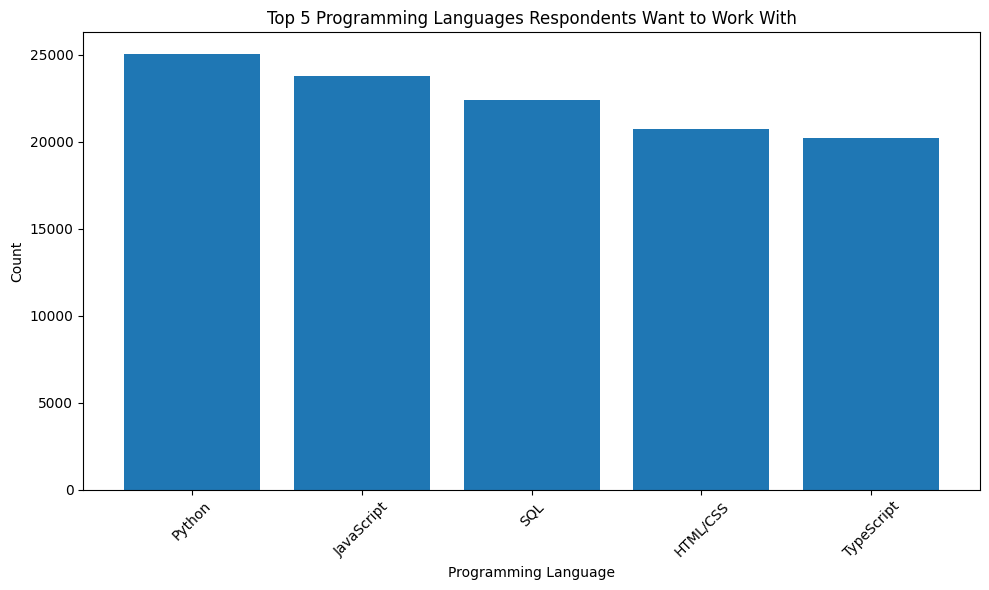

In [9]:
# Split and explode the column
df_lang = df['LanguageWantToWorkWith'].dropna().str.split(';')
df_lang_exploded = df_lang.explode()

# Count occurrences
top5_lang = df_lang_exploded.value_counts().head(5)

plt.figure(figsize=(10,6))
plt.bar(top5_lang.index, top5_lang.values)
plt.title("Top 5 Programming Languages Respondents Want to Work With")
plt.xlabel("Programming Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


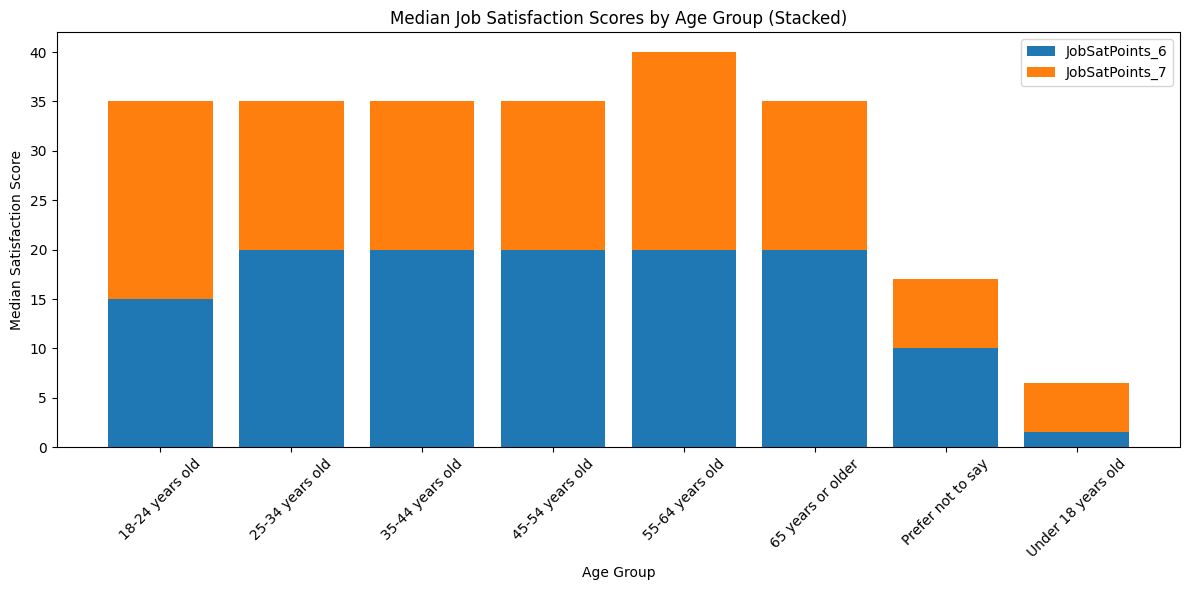

In [10]:
import numpy as np

# Select needed columns
df_js = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Compute medians
median_js = df_js.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort age groups alphabetically (optional, depends on dataset)
median_js = median_js.sort_index()

# Plot
plt.figure(figsize=(12,6))

# Bottom stack is JobSatPoints_6
plt.bar(median_js.index, median_js['JobSatPoints_6'], label='JobSatPoints_6')

# Top stack is JobSatPoints_7
plt.bar(median_js.index, median_js['JobSatPoints_7'],
        bottom=median_js['JobSatPoints_6'],
        label='JobSatPoints_7')

plt.title("Median Job Satisfaction Scores by Age Group (Stacked)")
plt.xlabel("Age Group")
plt.ylabel("Median Satisfaction Score")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



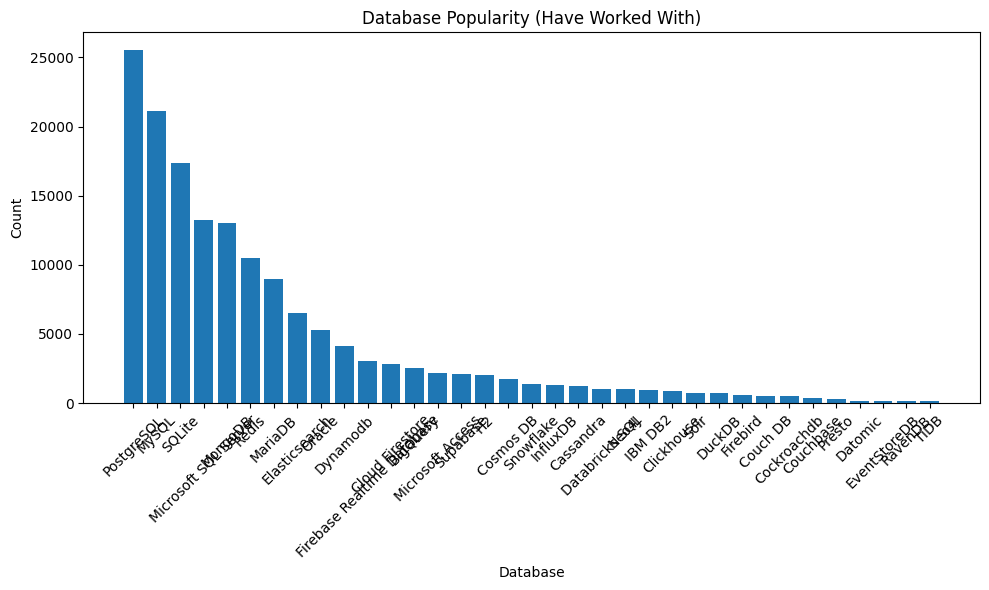

In [11]:
# Split and explode database column
df_db = df['DatabaseHaveWorkedWith'].dropna().str.split(';')
df_db_exploded = df_db.explode()

# Count databases
db_counts = df_db_exploded.value_counts()

plt.figure(figsize=(10,6))
plt.bar(db_counts.index, db_counts.values)
plt.title("Database Popularity (Have Worked With)")
plt.xlabel("Database")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



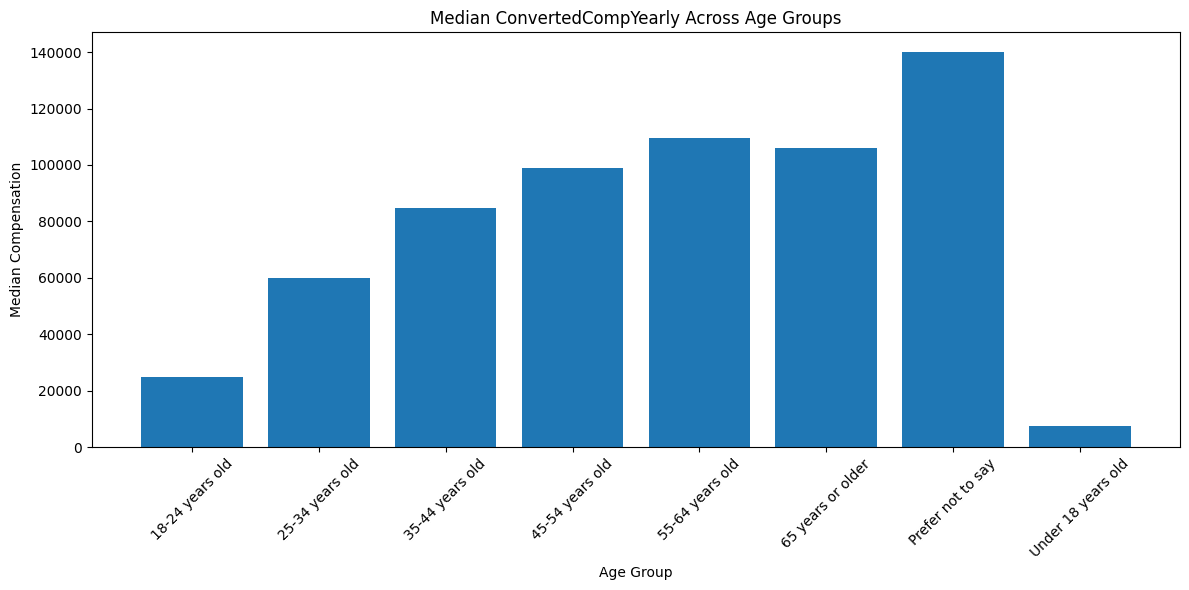

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Drop missing values for age & compensation
df_agecomp = df[['Age', 'ConvertedCompYearly']].dropna()

# Compute median compensation per age group
median_comp = df_agecomp.groupby('Age')['ConvertedCompYearly'].median()

# Sort age groups (string-based sorting may be okay depending on dataset)
median_comp = median_comp.sort_index()

plt.figure(figsize=(12,6))
plt.bar(median_comp.index, median_comp.values)
plt.title("Median ConvertedCompYearly Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Median Compensation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



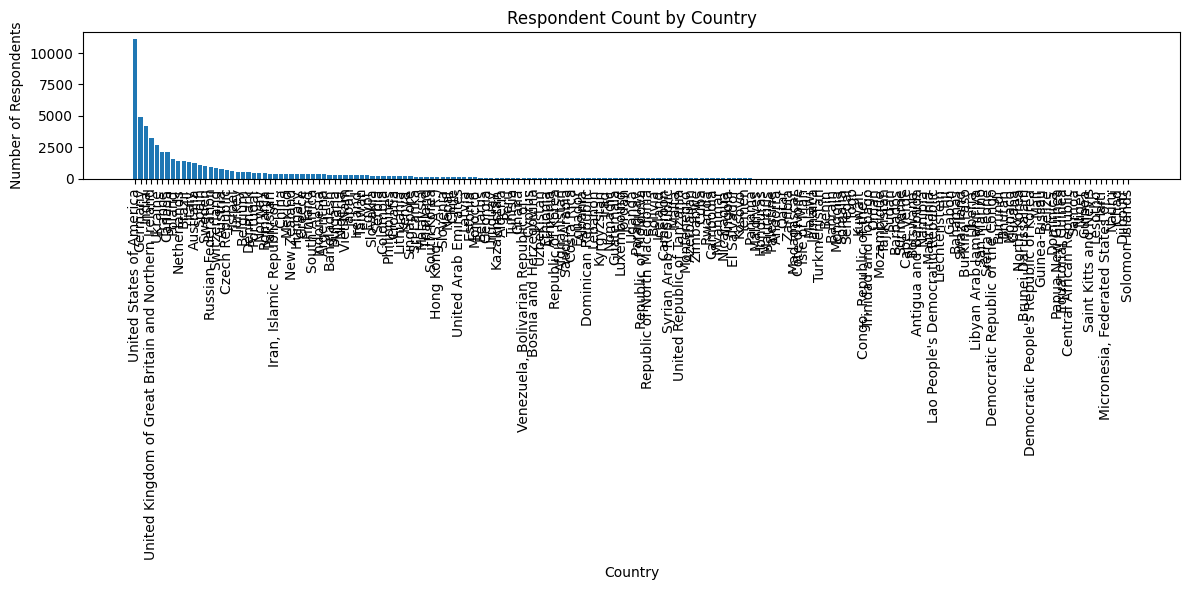

In [14]:
# Count respondents per country
country_counts = df['Country'].value_counts()

plt.figure(figsize=(12,6))
plt.bar(country_counts.index, country_counts.values)
plt.title("Respondent Count by Country")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
